## Analyze the Healthcare cost and Utilization in Wisconsin hospitals

### Question

A nationwide survey of hospital costs conducted by the US Agency for Healthcare consists of hospital records of inpatient samples. The given data is restricted to the city of Wisconsin and relates to patients in the age group 0-17 years. The agency wants to analyze the data to research on the healthcare costs and their utilization.

**Here is a detailed description of the given dataset:**<br>
AGE : Age of the patient discharged<br>
FEMALE : Binary variable that indicates if the patient is female<br>
LOS : Length of stay, in days<br>
RACE : Race of the patient (specified numerically)<br>
TOTCHG : Hospital discharge costs<br>
APRDRG : All Patient Refined Diagnosis Related Groups<br>

### Import Libraries for Data Analysis

In [1]:
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# suppress cell warnings
import warnings
warnings.filterwarnings("ignore")

### Data Importation

In [2]:
df = pd.read_csv('Downloads/HospitalCosts.csv')

In [3]:
#first five rows
df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


In [4]:
#Check for missing values
df.isnull().sum()

AGE       0
FEMALE    0
LOS       0
RACE      1
TOTCHG    0
APRDRG    0
dtype: int64

In [5]:
#Fill null values with average(mean)
df['RACE'] = df['RACE'].fillna(df['RACE'].mean())

In [6]:
#Check whether the null value are filled
df.isnull().sum()

AGE       0
FEMALE    0
LOS       0
RACE      0
TOTCHG    0
APRDRG    0
dtype: int64

In [ ]:
df.info()

In [7]:
#Perform descriptive statistics
df.describe()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5.086000,0.512000,2.828000,1.078156,2774.388000,616.360000
std,6.949474,0.500357,3.363487,0.514230,3888.407367,178.316044
min,0.000000,0.000000,0.000000,1.000000,532.000000,21.000000
25%,0.000000,0.000000,2.000000,1.000000,1216.250000,640.000000
50%,0.000000,1.000000,2.000000,1.000000,1536.500000,640.000000
75%,13.000000,1.000000,3.000000,1.000000,2530.250000,751.000000
max,17.000000,1.000000,41.000000,6.000000,48388.000000,952.000000


It appears that both Female and Race are categorical variables.Female takes on value of 1

**1. what is the age category of people who frequent the hospital**

In [8]:
df[['AGE']].value_counts().head(1)

AGE
0      307
dtype: int64

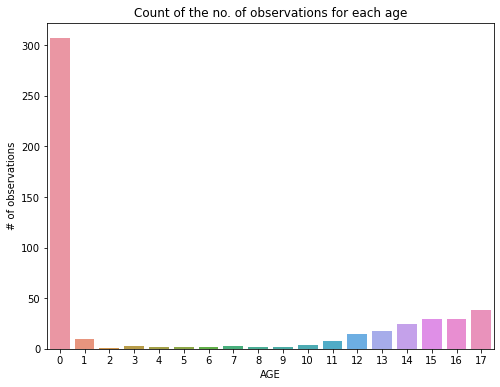

In [10]:
plt.subplots(figsize=(8,6))
sns.countplot(x='AGE', data=df) # Creates a count of the no. of observations located in each province.
plt.title('Count of the no. of observations for each age')
plt.ylabel('# of observations')
plt.show()

From the above plot, we can see that age category **0(infants)** has the highest visit to the hospital

In [9]:
df['RACE'].value_counts()

1.000000    484
2.000000      6
5.000000      3
4.000000      3
6.000000      2
1.078156      1
3.000000      1
Name: RACE, dtype: int64

**2. what is the age category of people who have the maximum expenditure.**

In [11]:
tot_charges_df = df.groupby('AGE')['TOTCHG'].sum().sort_values(ascending=False)
tot_charges_df.head(1)

AGE
0    678118
Name: TOTCHG, dtype: int64

From the above results, we can see that age category **0(infants)** has the highest expenditure

In [ ]:
los_df = df.groupby('AGE')['LOS'].sum().sort_values(ascending=False)
los_df.head(1)

**3. what is the diagnosis related group that has maximum hospitalization and expenditure.**

In [13]:
diagnosis_group_df = df.groupby('APRDRG')['TOTCHG'].sum().sort_values(ascending=False)
diagnosis_group_df.head(1)

APRDRG
640    437978
Name: TOTCHG, dtype: int64

From the above results, we can see that diagnosis related group **640** has the highest expenditure

In [14]:
df[['APRDRG']].value_counts().head(1)

APRDRG
640       267
dtype: int64

From the above results, we can see that diagnosis related group **640** has the maximum hospitalization 

In [15]:
df.corr()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
AGE,1.000000,0.233979,-0.068640,0.015841,0.131680,0.147497
FEMALE,0.233979,1.000000,0.035761,-0.038397,-0.060195,0.252863
LOS,-0.068640,0.035761,1.000000,-0.017793,0.623193,0.005059
RACE,0.015841,-0.038397,-0.017793,1.000000,-0.018161,-0.043736
TOTCHG,0.131680,-0.060195,0.623193,-0.018161,1.000000,-0.330001
APRDRG,0.147497,0.252863,0.005059,-0.043736,-0.330001,1.000000


There is a weak negative relationship between Hospitilisation costs and age

**Checking for linearity**

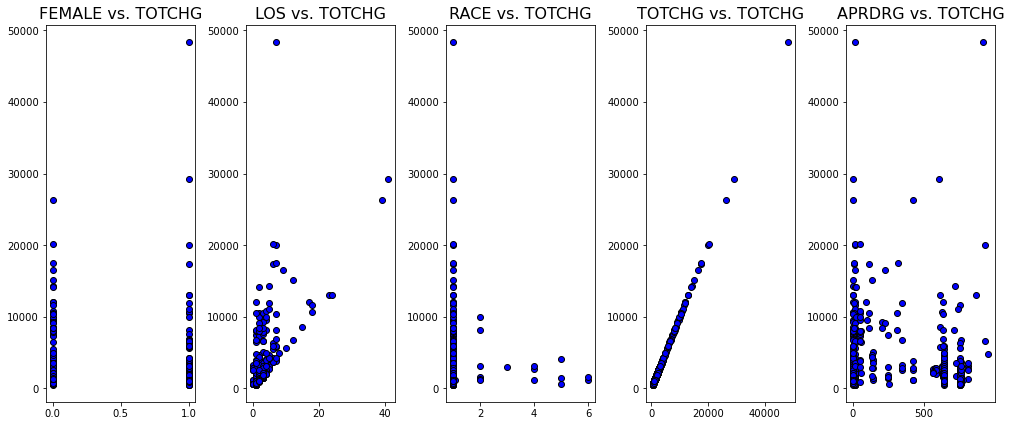

In [16]:
fig, axs = plt.subplots(1,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. TOTCHG".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['TOTCHG'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)

In [17]:
import statsmodels.formula.api as sm

**4. Is the race of the patient related to the hospitalization costs.**

In [18]:
formula_str = df.columns[4]+' ~ '+ df.columns[3]; 
formula_str

'TOTCHG ~ RACE'

In [19]:
model=sm.ols(formula=formula_str, data=df)

In [20]:
fitted = model.fit()

In [21]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1643
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.685
Time:                        18:08:19   Log-Likelihood:                -4841.8
No. Observations:                 500   AIC:                             9688.
Df Residuals:                     498   BIC:                             9696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2922.4485    404.610      7.223      0.0

H0: There is no relationship between race and hospitalcosts<br>
H1: There is a relationship between race and hospitalcosts

From the above results, we fail to reject null hypothesis(H0) since p-value(0.685) > p-alpha(0.05) and conclude that race is not related to hospitilisation costs

In [22]:
model_df = df.loc[:,['TOTCHG','AGE','FEMALE']]
model_df.head()

,TOTCHG,AGE,FEMALE
0,2660,17,1
1,1689,17,0
2,20060,17,1
3,736,17,1
4,1194,17,1


In [23]:
formula_str = model_df.columns[0]+' ~ '+'+'.join(model_df.columns[1:])
formula_str

'TOTCHG ~ AGE+FEMALE'

In [24]:
model=sm.ols(formula=formula_str, data=model_df)

In [25]:
fitted = model.fit()

In [26]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.660
Date:                Sun, 06 Feb 2022   Prob (F-statistic):            0.00140
Time:                        18:09:03   Log-Likelihood:                -4835.2
No. Observations:                 500   AIC:                             9676.
Df Residuals:                     497   BIC:                             9689.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2718.6282    261.136     10.411      0.0

Since the pValue of AGE is much lesser than 0.05, the ideal statistical significance level.It means AGE has the most statistical significance.
Similarly, gender is also less than 0.05.
Hence, we can conclude that the model is statistically significant(We reject H0)

**5. Determine if the length of stay can be predicted from age, gender, and race.**

In [27]:
feature_selection_df = df.loc[:,['LOS','AGE','FEMALE','RACE']]

In [28]:
formula_str = feature_selection_df.columns[0]+' ~ '+'+'.join(feature_selection_df.columns[1:]); 
formula_str

'LOS ~ AGE+FEMALE+RACE'

In [29]:
model=sm.ols(formula=formula_str, data=df)

In [30]:
fitted = model.fit()

In [31]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    LOS   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.293
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.276
Time:                        18:10:06   Log-Likelihood:                -1313.5
No. Observations:                 500   AIC:                             2635.
Df Residuals:                     496   BIC:                             2652.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9429      0.393      7.492      0.0

The p-value is higher than 0.05 for age, gender and race, indicating there is no linear relationship between these variables and length of stay.
Hence, age, gender and race cannot be used to predict the length of stay of inpatients.

**6. Determine the variable that mainly affects the hospital costs.**

In [32]:
full_variables_df = df.loc[:,['TOTCHG','AGE','FEMALE','LOS','RACE','APRDRG']]
full_variables_df.head()

,TOTCHG,AGE,FEMALE,LOS,RACE,APRDRG
0,2660,17,1,2,1.0,560
1,1689,17,0,2,1.0,753
2,20060,17,1,7,1.0,930
3,736,17,1,1,1.0,758
4,1194,17,1,1,1.0,754


In [33]:
formula_str = full_variables_df.columns[0]+' ~ '+'+'.join(full_variables_df.columns[1:])
formula_str

'TOTCHG ~ AGE+FEMALE+LOS+RACE+APRDRG'

In [34]:
model=sm.ols(formula=formula_str, data=full_variables_df)

In [35]:
fitted = model.fit()

In [36]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     122.6
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           3.43e-84
Time:                        18:10:27   Log-Likelihood:                -4640.1
No. Observations:                 500   AIC:                             9292.
Df Residuals:                     494   BIC:                             9318.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5218.7633    507.118     10.291      0.0

From the above, we can see that Race mainly affects hospital costs